In [1]:
#pip install seaborn

In [31]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib import *
import seaborn as sns


In [32]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

In [33]:
import tensorflow as tf
from tensorflow import keras

In [34]:
print(tf.__version__)

2.18.0


In [35]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

In [36]:
np.random.seed(42)

In [37]:
df = pd.read_csv('credit_risk_dataset.csv')

In [38]:
df.head()


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,35000,14.27,1,0.55,Y,4


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_amnt                   32581 non-null  int64  
 6   loan_int_rate               29465 non-null  float64
 7   loan_status                 32581 non-null  int64  
 8   loan_percent_income         32581 non-null  float64
 9   cb_person_default_on_file   32581 non-null  object 
 10  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 2.7+ MB


In [40]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [41]:
imputer = SimpleImputer(strategy='mean')

df['person_emp_length'] = imputer.fit_transform(df[['person_emp_length']])
df['loan_int_rate'] = imputer.fit_transform(df[['loan_int_rate']])

In [42]:
df.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [43]:
df.duplicated().sum()

165

In [44]:
df= df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32416 entries, 0 to 32580
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32416 non-null  int64  
 1   person_income               32416 non-null  int64  
 2   person_home_ownership       32416 non-null  object 
 3   person_emp_length           32416 non-null  float64
 4   loan_intent                 32416 non-null  object 
 5   loan_amnt                   32416 non-null  int64  
 6   loan_int_rate               32416 non-null  float64
 7   loan_status                 32416 non-null  int64  
 8   loan_percent_income         32416 non-null  float64
 9   cb_person_default_on_file   32416 non-null  object 
 10  cb_person_cred_hist_length  32416 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 3.0+ MB


In [46]:
df['loan_status'].value_counts()


loan_status
0    25327
1     7089
Name: count, dtype: int64

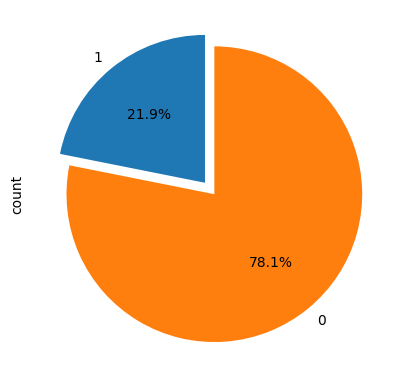

In [47]:
df['loan_status'].value_counts(sort=False).plot.pie(autopct='%1.1f%%', startangle=90, explode=[0.1,0])
plt.show()

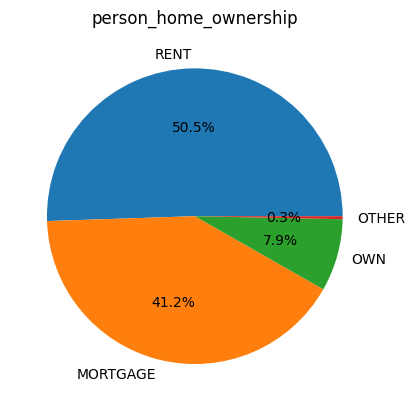

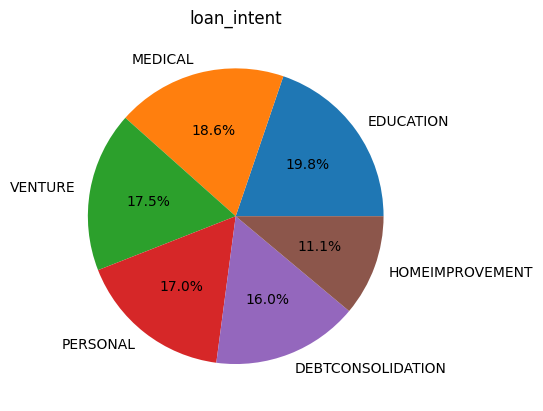

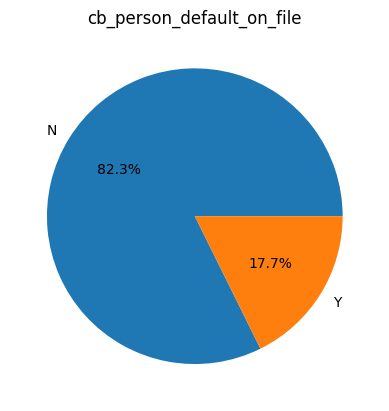

In [48]:
for i in df.select_dtypes(exclude=np.number).columns:
    value_counts = df[i].value_counts()
    plt.pie(x=value_counts, labels=value_counts.index, autopct= '%1.1f%%')
    plt.title(i)
    plt.show()

In [49]:
df[(df['person_age'] >= 100)]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
81,144,250000,RENT,4.0,VENTURE,4800,13.570000,0,0.02,N,3
183,144,200000,MORTGAGE,4.0,EDUCATION,6000,11.860000,0,0.03,N,2
575,123,80004,RENT,2.0,EDUCATION,20400,10.250000,0,0.25,N,3
747,123,78000,RENT,7.0,VENTURE,20000,11.011695,0,0.26,N,4
32297,144,6000000,MORTGAGE,12.0,PERSONAL,5000,12.730000,0,0.00,N,25


In [50]:
df = df.drop(df[(df['person_age'] >= 100)].index)

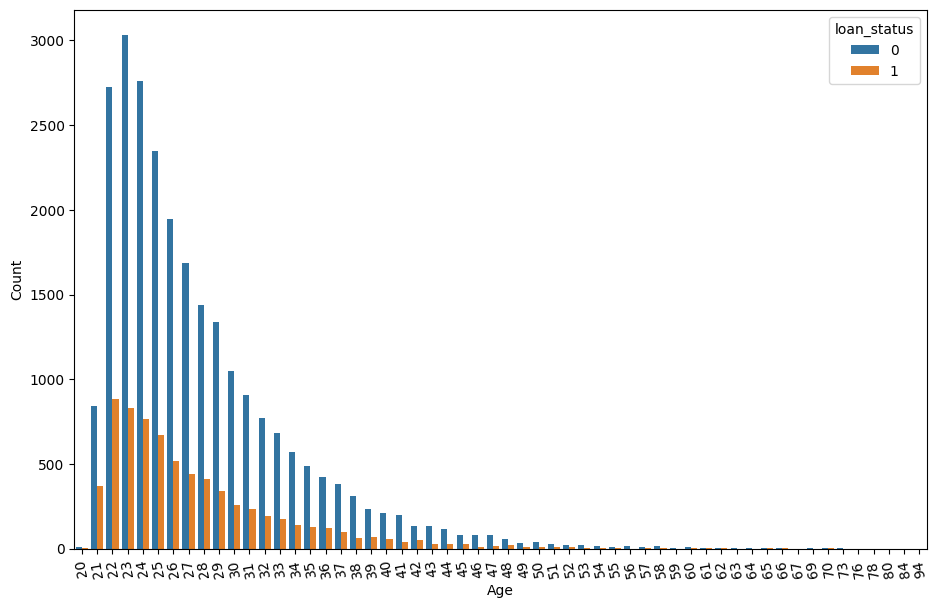

In [51]:
fig = plt.figure(figsize=(11, 7))
sns.countplot(data = df, x = 'person_age', hue = 'loan_status')

plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation=100)
plt.show();

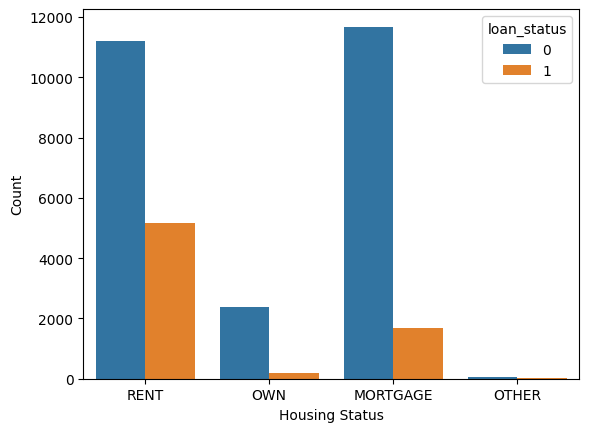

In [52]:
sns.countplot(data = df, x = 'person_home_ownership', hue = 'loan_status')

plt.xlabel('Housing Status')
plt.ylabel('Count')
plt.show();

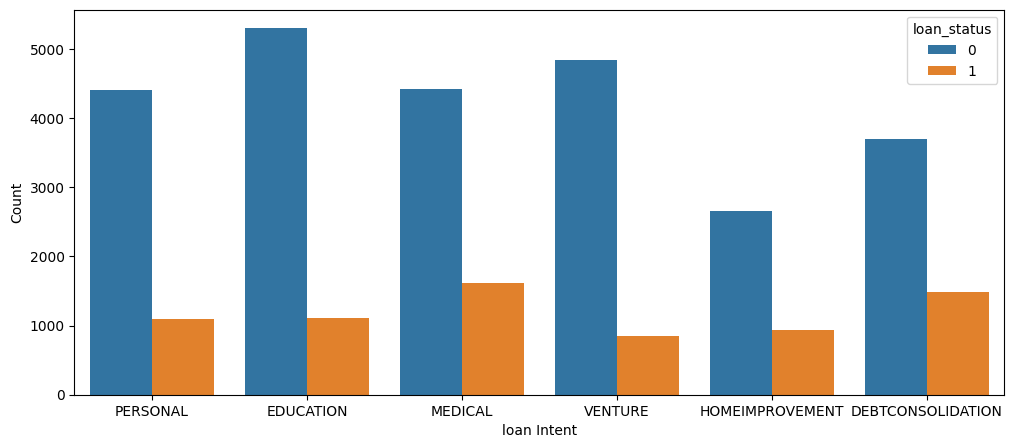

In [54]:
fig = plt.figure(figsize=(12,5))
sns.countplot(data = df, x = 'loan_intent', hue = 'loan_status')
plt.xlabel('loan Intent')
plt.ylabel('Count')
plt.show()

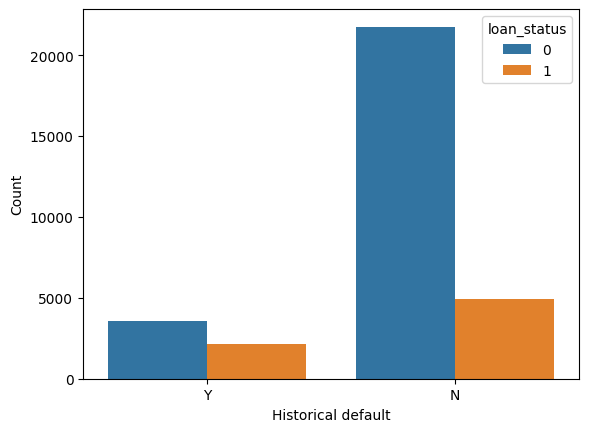

In [55]:
sns.countplot(data = df, x = 'cb_person_default_on_file', hue = 'loan_status')
plt.xlabel('Historical default')
plt.ylabel('Count')
plt.show();

In [56]:
for colname in df.select_dtypes("object"):
    df[colname], _ = df[colname].factorize()

In [57]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32411 entries, 0 to 32580
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32411 non-null  int64  
 1   person_income               32411 non-null  int64  
 2   person_home_ownership       32411 non-null  int64  
 3   person_emp_length           32411 non-null  float64
 4   loan_intent                 32411 non-null  int64  
 5   loan_amnt                   32411 non-null  int64  
 6   loan_int_rate               32411 non-null  float64
 7   loan_status                 32411 non-null  int64  
 8   loan_percent_income         32411 non-null  float64
 9   cb_person_default_on_file   32411 non-null  int64  
 10  cb_person_cred_hist_length  32411 non-null  int64  
dtypes: float64(3), int64(8)
memory usage: 3.0 MB


In [58]:
correlation_credit_risk = df.corr()
correlation_credit_risk

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
person_age,1.000000,0.140393,0.032486,0.164081,0.026672,0.051460,0.010513,-0.021808,-0.041546,-0.006537,0.878238
person_income,0.140393,1.000000,0.231399,0.150957,0.024362,0.316717,-0.001063,-0.169284,-0.294732,0.002562,0.122612
person_home_ownership,0.032486,0.231399,1.000000,0.228437,0.017222,0.129275,-0.131836,-0.218461,-0.135102,0.061586,0.025462
person_emp_length,0.164081,0.150957,0.228437,1.000000,0.016314,0.111931,-0.053068,-0.081290,-0.052950,0.027730,0.142884
loan_intent,0.026672,0.024362,0.017222,0.016314,1.000000,0.018932,0.006208,0.065827,-0.002263,-0.010578,0.016466
loan_amnt,0.051460,0.316717,0.129275,0.111931,0.018932,1.000000,0.139670,0.105771,0.572779,-0.039365,0.042018
loan_int_rate,0.010513,-0.001063,-0.131836,-0.053068,0.006208,0.139670,1.000000,0.320099,0.114513,-0.477082,0.014970
loan_status,-0.021808,-0.169284,-0.218461,-0.081290,0.065827,0.105771,0.320099,1.000000,0.379704,-0.179354,-0.016473
loan_percent_income,-0.041546,-0.294732,-0.135102,-0.052950,-0.002263,0.572779,0.114513,0.379704,1.000000,-0.036170,-0.031281
cb_person_default_on_file,-0.006537,0.002562,0.061586,0.027730,-0.010578,-0.039365,-0.477082,-0.179354,-0.036170,1.000000,-0.004199


In [59]:
corr_order = df.corr()[['loan_status']].sort_values(by='loan_status', ascending=False)
corr_order

,loan_status
loan_status,1.000000
loan_percent_income,0.379704
loan_int_rate,0.320099
loan_amnt,0.105771
loan_intent,0.065827
cb_person_cred_hist_length,-0.016473
person_age,-0.021808
person_emp_length,-0.081290
person_income,-0.169284
cb_person_default_on_file,-0.179354


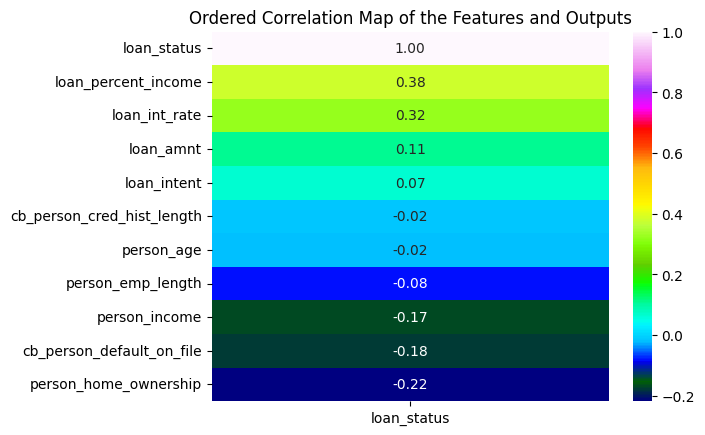

In [60]:
sns.heatmap(corr_order, annot=True, fmt='.2f', cmap='gist_ncar')
plt.title('Ordered Correlation Map of the Features and Outputs')
plt.show()

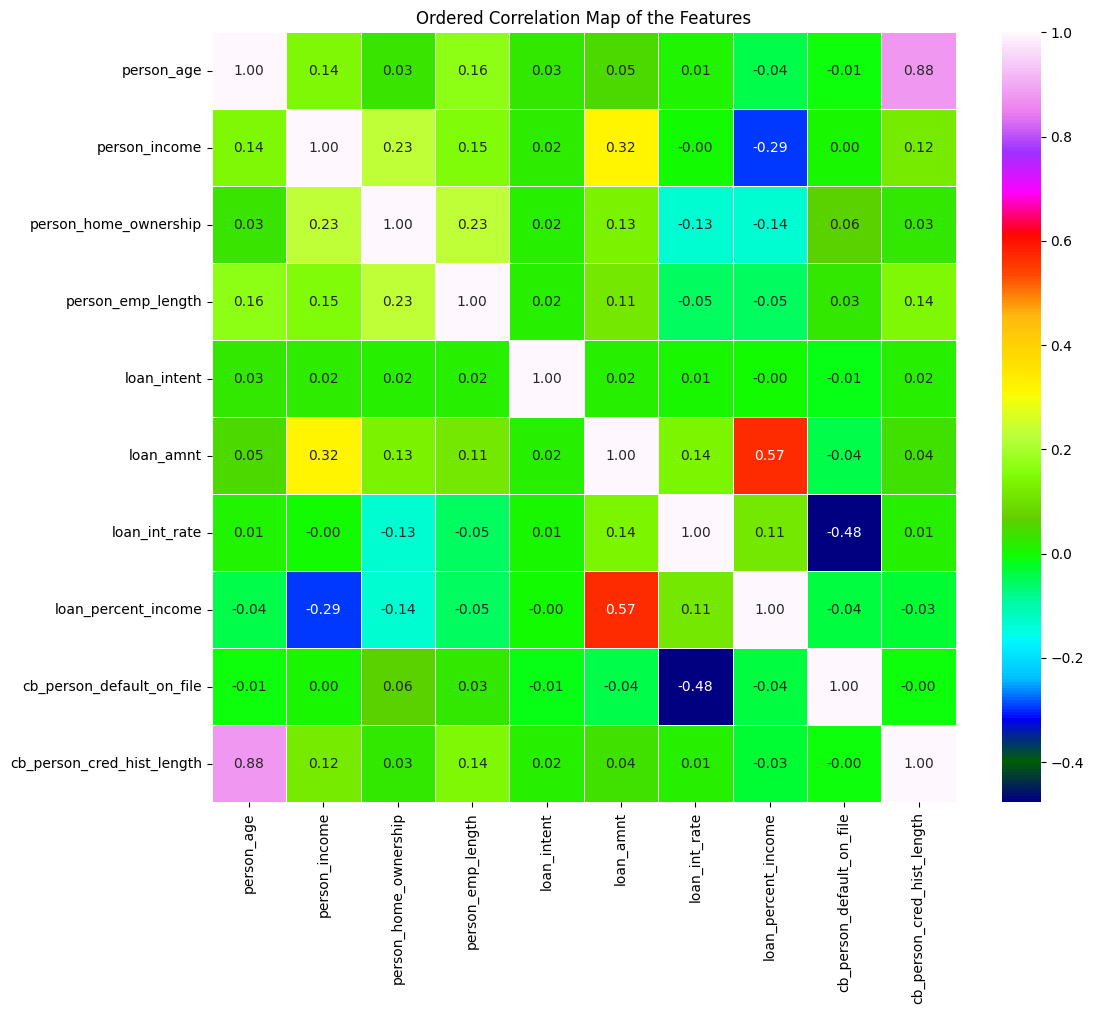

In [61]:
plt.figure(figsize=(12,10))
corr_order_without_target = df.drop('loan_status', axis=1).corr()
sns.heatmap(corr_order_without_target, annot=True, fmt='.2f', annot_kws={"size": 10}, cbar=True, linewidths=0.5, cmap='gist_ncar')
plt.title('Ordered Correlation Map of the Features')
plt.show()

In [62]:
X = df.drop('loan_status', axis=1)
y = df['loan_status']

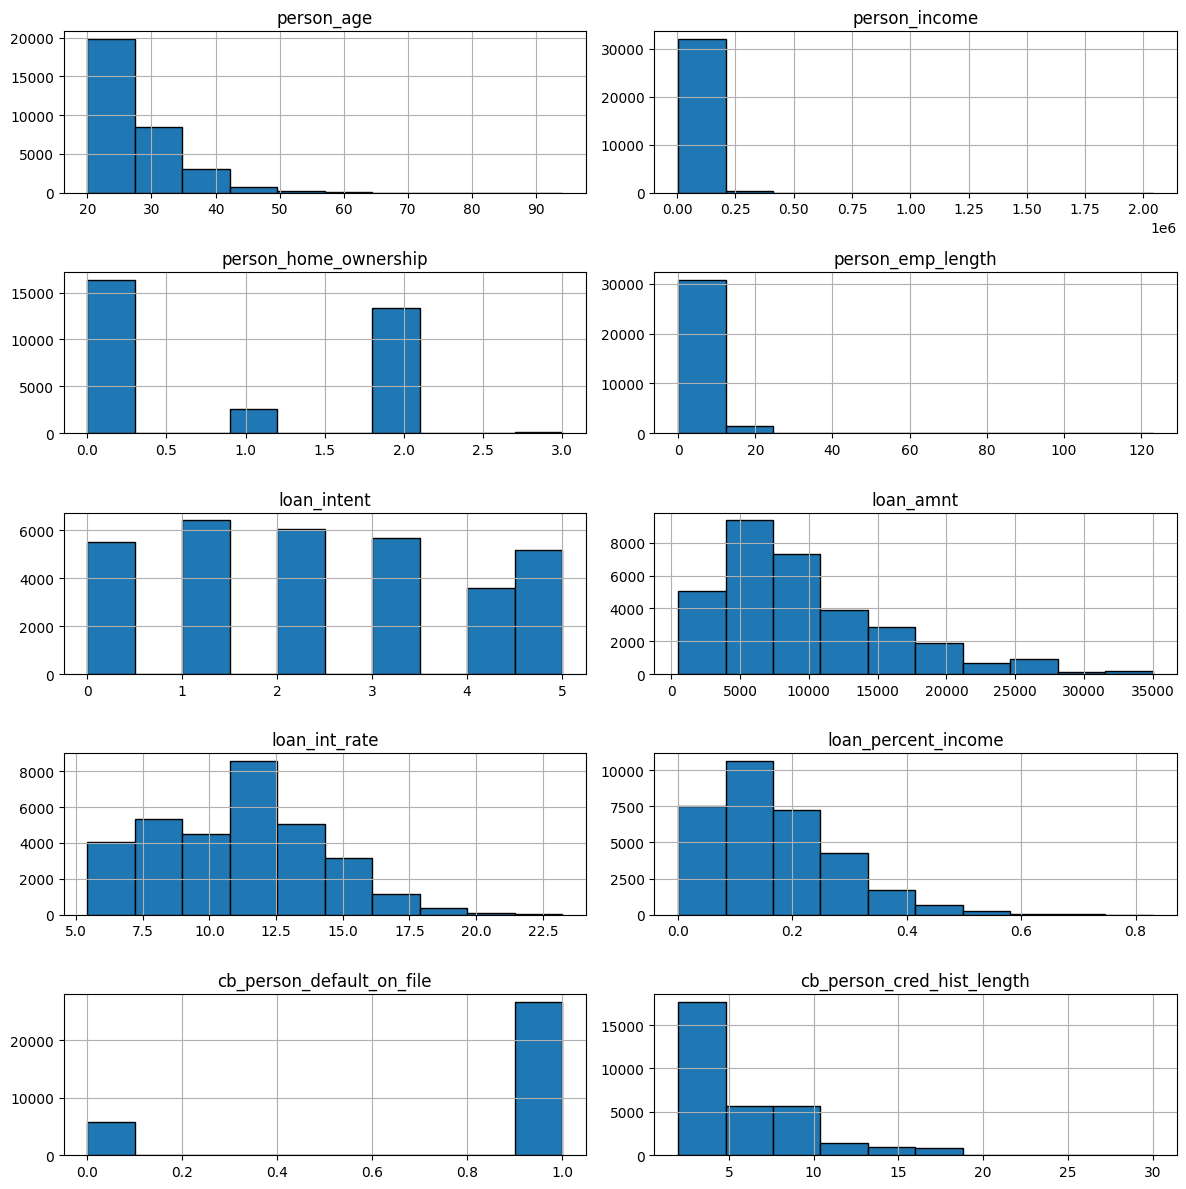

In [63]:
X.hist(layout=(5,2), figsize=(12,12), edgecolor= 'black')
plt.tight_layout()
plt.show()

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [65]:
scaler = StandardScaler()
X_train_imb = scaler.fit_transform(X_train)
X_test_imb =  scaler.transform (X_test)

In [66]:
X_train_imb.shape

(25928, 10)

In [67]:
model = keras.Sequential([
    keras.layers.Dense(512, input_shape=(10,), activation=tf.nn.relu, kernel_initializer="normal"),
    keras.layers.Dense(256, activation='relu', kernel_initializer="normal"),
    keras.layers.Dense(128, activation='relu', kernel_initializer="normal"),
    keras.layers.Dense(1, activation='sigmoid')
])
print(model.summary())

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │         5,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 169,985 (664.00 KB)

 Trainable params: 169,985 (664.00 KB)

 Non-trainable params: 0 (0.00 B)

None


In [68]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [69]:
mc = ModelCheckpoint('best_model_MLP.keras', monitor='val_loss', mode='min', verbose=1,save_best_only=True)

In [70]:
es = EarlyStopping(monitor='val_loss', mode='min', patience=10, restore_best_weights=True, verbose=1)

In [71]:
history = model.fit(X_train_imb, y_train, batch_size=32,
                    epochs=20,
                    validation_split=0.2, shuffle=True,
                    verbose=1, callbacks=[es, mc])

Epoch 1/20
648/649 ━━━━━━━━━━━━━━━━━━━━ 0s 936us/step - accuracy: 0.8368 - loss: 0.3950
Epoch 1: val_loss improved from inf to 0.33292, saving model to best_model_MLP.keras
649/649 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8369 - loss: 0.3949 - val_accuracy: 0.8658 - val_loss: 0.3329
Epoch 2/20
623/649 ━━━━━━━━━━━━━━━━━━━━ 0s 974us/step - accuracy: 0.8730 - loss: 0.3263
Epoch 2: val_loss improved from 0.33292 to 0.30929, saving model to best_model_MLP.keras
649/649 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8730 - loss: 0.3262 - val_accuracy: 0.8793 - val_loss: 0.3093
Epoch 3/20
619/649 ━━━━━━━━━━━━━━━━━━━━ 0s 978us/step - accuracy: 0.8790 - loss: 0.3132
Epoch 3: val_loss improved from 0.30929 to 0.30773, saving model to best_model_MLP.keras
649/649 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8790 - loss: 0.3132 - val_accuracy: 0.8779 - val_loss: 0.3077
Epoch 4/20
639/649 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8811 - loss: 0.3014
Epoch 4: val_loss improved from 0.30

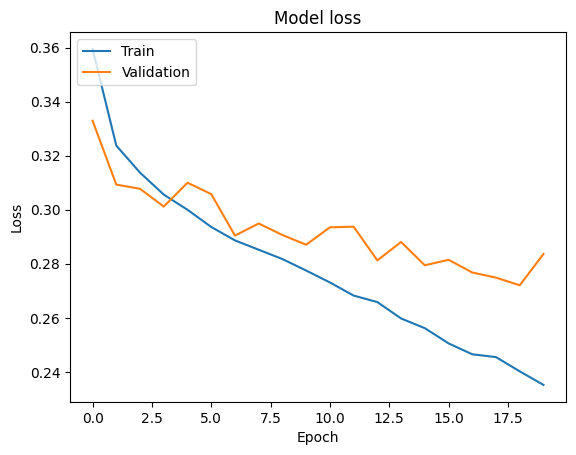

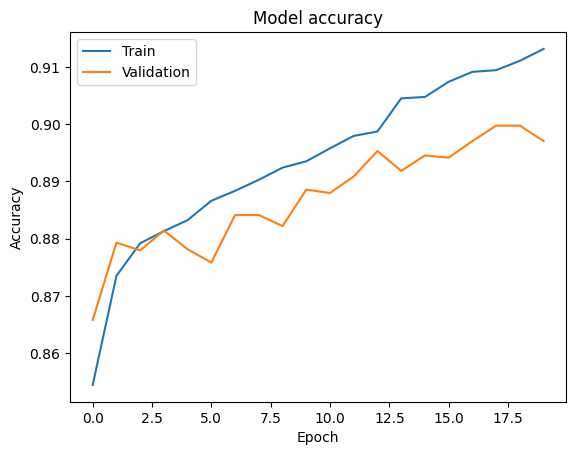

In [72]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()



plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [73]:
y_pred_ANN = (model.predict(X_test_imb))

203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step


In [74]:
print(y_pred_ANN[:10])
y_pred_ANN_labels = (y_pred_ANN >= 0.5).astype(int)

[[0.03342705]
 [0.02648139]
 [0.03512822]
 [0.13686074]
 [0.18324094]
 [1.        ]
 [0.00925253]
 [0.7901494 ]
 [0.11439066]
 [0.09188596]]


Imbalanced MLP Dataset Results
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      5080
           1       0.90      0.60      0.72      1403

    accuracy                           0.90      6483
   macro avg       0.90      0.79      0.83      6483
weighted avg       0.90      0.90      0.89      6483



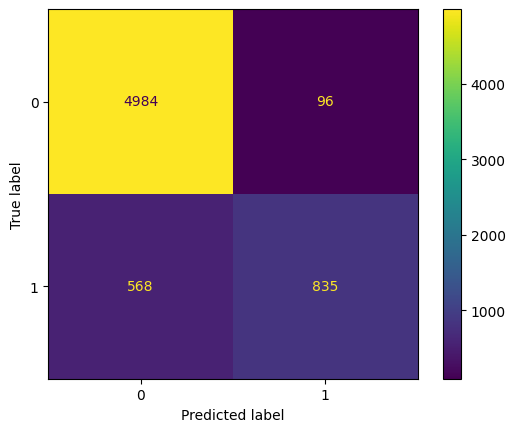

In [75]:
print("Imbalanced MLP Dataset Results")
print(classification_report(y_test, y_pred_ANN_labels))

# Confusion matrix for ANN
cm = confusion_matrix(y_test, y_pred_ANN_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot()
plt.show()

In [76]:
rf = RandomForestClassifier()
rf.fit(X, y)

RandomForestClassifier()

In [77]:
importances =  rf.feature_importances_
feature_names = X.columns

In [78]:
indices = np.argsort(importances)[::-1]

In [79]:
print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, feature_names[indices[f]], importances[indices[f]]))

Feature ranking:
1. feature loan_percent_income (0.229421)
2. feature loan_int_rate (0.191832)
3. feature person_income (0.163645)
4. feature person_home_ownership (0.100359)
5. feature loan_amnt (0.080432)
6. feature loan_intent (0.065423)
7. feature person_emp_length (0.063226)
8. feature person_age (0.049591)
9. feature cb_person_cred_hist_length (0.039999)
10. feature cb_person_default_on_file (0.016072)


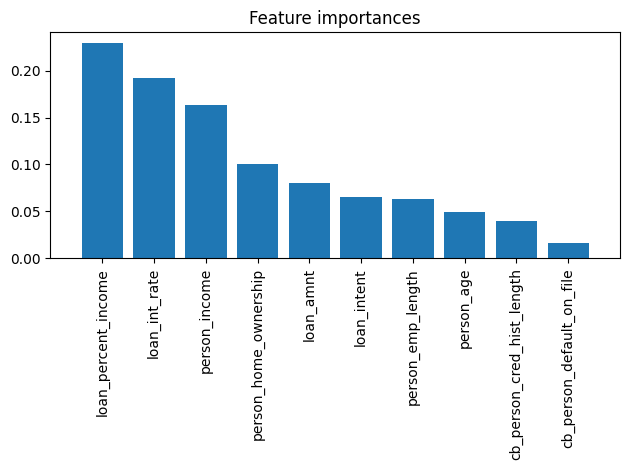

In [80]:
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.tight_layout()
plt.show()

In [81]:

new_random = RandomForestClassifier(n_estimators=200,
                                criterion='gini',
                                max_features='sqrt',
                                max_depth=10,
                                min_samples_split=5,
                                min_samples_leaf=2,
                                random_state=42)

new_random.fit(X_train_imb, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=200, random_state=42)

In [82]:
y_pred_random = new_random.predict(X_test_imb)

In [83]:
print(classification_report(y_test, y_pred_random))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      5080
           1       0.94      0.64      0.76      1403

    accuracy                           0.91      6483
   macro avg       0.92      0.82      0.86      6483
weighted avg       0.92      0.91      0.91      6483



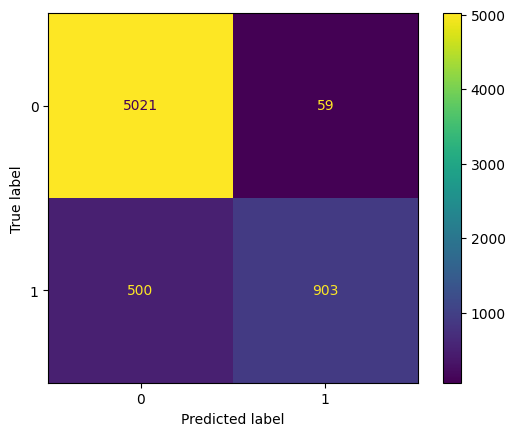

In [84]:
# Confusion matrix for Random Forest

cm_random = confusion_matrix(y_test, y_pred_random)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_random, display_labels=[0, 1])
disp_rf.plot()
plt.show();

In [85]:
# Defining the parameter grid for grid search

param_grid = {
    'C': [0.01, 0.1, 1.0, 10.0],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

In [86]:
# Perform grid search with cross-validation

grid_search = GridSearchCV(estimator=LogisticRegression(max_iter=1000), 
                           param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train_imb, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1.0, 10.0], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy')

In [87]:
# Print the best parameters and the best cross-validation score

print(f'Best parameters: {grid_search.best_params_}')
print(f'Best cross-validation score: {grid_search.best_score_:.2f}')

Best parameters: {'C': 1.0, 'penalty': 'l2', 'solver': 'saga'}
Best cross-validation score: 0.84


In [88]:
best_model = grid_search.best_estimator_

In [89]:
y_pred_log = best_model.predict(X_test_imb)

Classification report:
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      5080
           1       0.72      0.43      0.53      1403

    accuracy                           0.84      6483
   macro avg       0.79      0.69      0.72      6483
weighted avg       0.83      0.84      0.82      6483



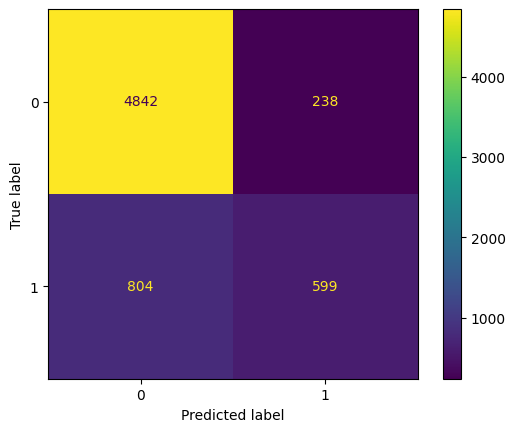

In [90]:
print('Classification report:')
print(classification_report(y_test, y_pred_log))
cm = confusion_matrix(y_test, y_pred_log)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot()
plt.show();

In [91]:
from sklearn.metrics import recall_score, f1_score, precision_score, accuracy_score, roc_auc_score

In [92]:
imbalance_ai_models = ['Random Forest', 'Logistic Regression', 'MLP']
prediction_imb = [y_pred_random, y_pred_log, y_pred_ANN]

In [93]:
print("Type of prediction_imb:", type(prediction_imb))
print("Type of each element in prediction_imb:", type(prediction_imb[0]))

Type of prediction_imb: <class 'list'>
Type of each element in prediction_imb: <class 'numpy.ndarray'>


In [94]:
threshold = 0.5
prediction_imb = [np.where(pred >= threshold, 1, 0) for pred in prediction_imb]

In [95]:
accuracy_imb = []
precision_imb = []
recall_imb =[]
f1_imb = []
auc_imb = []
for x in range(0, len(prediction_imb)):
    acc_score = np.round(accuracy_score(y_test, prediction_imb[x]) * 100, 2)
    accuracy_imb.append(acc_score)
    pre_score = np.round(precision_score(y_test, prediction_imb[x], average='weighted') * 100, 2)
    precision_imb.append(pre_score)
    rc_score = np.round(recall_score(y_test, prediction_imb[x], average='weighted') * 100, 2)
    recall_imb.append(rc_score)
    f_score = np.round(f1_score(y_test, prediction_imb[x], average='weighted') * 100, 2)
    f1_imb.append(f_score)
    auc_sc = np.round(roc_auc_score(y_test, prediction_imb[x]) * 100, 2)
    auc_imb.append(auc_sc)

In [96]:
model_perform_imb  = {'Imbalance AI Models':imbalance_ai_models,
              'Accuracy':accuracy_imb,
               'Precision':precision_imb,
               'Recall':recall_imb,
               'F1-Score':f1_imb,
               'AUC':auc_imb
              }
model_data_imb  = pd.DataFrame(model_perform_imb)
print('Result of testing with an Imbalanced Dataset')
model_data_imb

Result of testing with an Imbalanced Dataset


,Imbalance AI Models,Accuracy,Precision,Recall,F1-Score,AUC
0,Random Forest,91.38,91.58,91.38,90.75,81.60
1,Logistic Regression,83.93,82.69,83.93,82.32,69.00
2,MLP,89.76,89.75,89.76,88.95,78.81


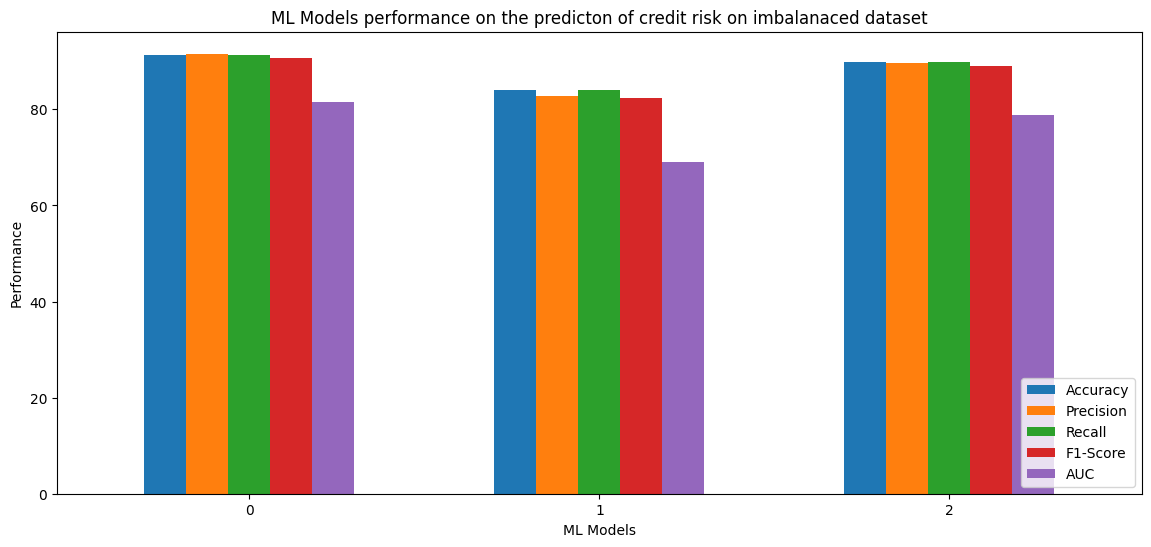

In [97]:
model_imb = model_data_imb.set_index('Imbalance AI Models')

model_data_imb.plot(kind='bar', figsize=(14,6), width=0.6)
plt.title('ML Models performance on the predicton of credit risk on imbalanaced dataset')
plt.ylabel('Performance')
plt.xlabel('ML Models')
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.show()

In [99]:
#LSTM CODE

In [101]:

X_train_lstm = X_train_imb.reshape((X_train_imb.shape[0], 1, X_train_imb.shape[1]))
X_test_lstm = X_test_imb.reshape((X_test_imb.shape[0], 1, X_test_imb.shape[1]))


In [102]:
# LSTM Model
lstm_model = keras.Sequential([
    keras.layers.LSTM(128, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2]), activation='relu', return_sequences=True),
    keras.layers.Dropout(0.2),
    keras.layers.LSTM(64, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1, activation='sigmoid')
])

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [103]:
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [104]:
print(lstm_model.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 1, 128)         │        71,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 120,641 (471.25 KB)

 Trainable params: 120,641 (471.25 KB)

 Non-trainable params: 0 (0.00 B)

None


In [105]:
lstm_history = lstm_model.fit(
    X_train_lstm, y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.2,
    callbacks=[es, mc],
    verbose=1
)


Epoch 1/20
626/649 ━━━━━━━━━━━━━━━━━━━━ 0s 966us/step - accuracy: 0.8058 - loss: 0.4812
Epoch 1: val_loss did not improve from 0.27203
649/649 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8066 - loss: 0.4788 - val_accuracy: 0.8479 - val_loss: 0.3616
Epoch 2/20
612/649 ━━━━━━━━━━━━━━━━━━━━ 0s 995us/step - accuracy: 0.8489 - loss: 0.3641
Epoch 2: val_loss did not improve from 0.27203
649/649 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8490 - loss: 0.3640 - val_accuracy: 0.8602 - val_loss: 0.3385
Epoch 3/20
611/649 ━━━━━━━━━━━━━━━━━━━━ 0s 993us/step - accuracy: 0.8578 - loss: 0.3481
Epoch 3: val_loss did not improve from 0.27203
649/649 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8579 - loss: 0.3480 - val_accuracy: 0.8671 - val_loss: 0.3263
Epoch 4/20
632/649 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8608 - loss: 0.3492
Epoch 4: val_loss did not improve from 0.27203
649/649 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8609 - loss: 0.3489 - val_accuracy: 0.8683 - val_loss: 0

In [106]:
y_pred_lstm = (lstm_model.predict(X_test_lstm) >= 0.5).astype(int)

203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 721us/step


In [107]:
accuracy_lstm = np.round(accuracy_score(y_test, y_pred_lstm) * 100, 2)
precision_lstm = np.round(precision_score(y_test, y_pred_lstm, average='weighted') * 100, 2)
recall_lstm = np.round(recall_score(y_test, y_pred_lstm, average='weighted') * 100, 2)
f1_lstm = np.round(f1_score(y_test, y_pred_lstm, average='weighted') * 100, 2)
auc_lstm = np.round(roc_auc_score(y_test, y_pred_lstm) * 100, 2)

In [108]:
print("LSTM Model Performance Metrics")
print(f"Accuracy: {accuracy_lstm}%")
print(f"Precision: {precision_lstm}%")
print(f"Recall: {recall_lstm}%")
print(f"F1-Score: {f1_lstm}%")
print(f"AUC: {auc_lstm}%")

LSTM Model Performance Metrics
Accuracy: 84.74%
Precision: 84.19%
Recall: 84.74%
F1-Score: 82.62%
AUC: 68.24%


In [109]:
imbalance_ai_models.append('LSTM')
accuracy_imb.append(accuracy_lstm)
precision_imb.append(precision_lstm)
recall_imb.append(recall_lstm)
f1_imb.append(f1_lstm)
auc_imb.append(auc_lstm)

In [121]:
model_perform_imb = {
    'Imbalance AI Models': imbalance_ai_models,
    'Accuracy': accuracy_imb,
    'Precision': precision_imb,
    'Recall': recall_imb,
    'F1-Score': f1_imb,
    'AUC': auc_imb
}
model_data_imb = pd.DataFrame(model_perform_imb)

In [122]:
print('Result of testing with an Imbalanced Dataset')
print(model_data_imb)

Result of testing with an Imbalanced Dataset
   Imbalance AI Models  Accuracy  Precision  Recall  F1-Score    AUC
0        Random Forest     91.38      91.58   91.38     90.75  81.60
1  Logistic Regression     83.93      82.69   83.93     82.32  69.00
2                  MLP     89.76      89.75   89.76     88.95  78.81
3                 LSTM     84.74      84.19   84.74     82.62  68.24


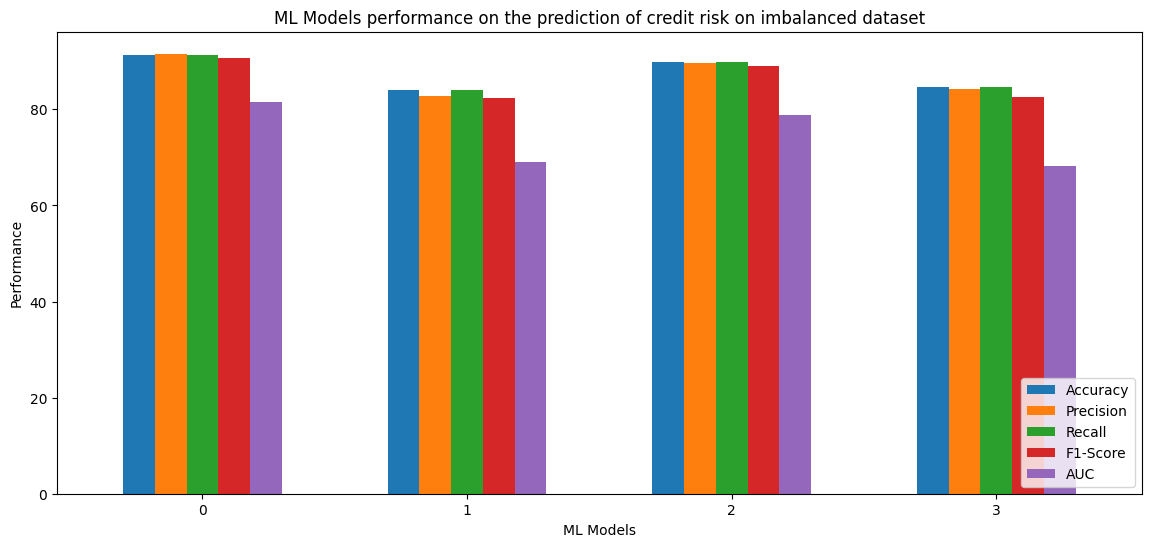

In [111]:
model_data_imb = pd.DataFrame(model_perform_imb)
model_data_imb.plot(kind='bar', figsize=(14, 6), width=0.6)
plt.title('ML Models performance on the prediction of credit risk on imbalanced dataset')
plt.ylabel('Performance')
plt.xlabel('ML Models')
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.show()

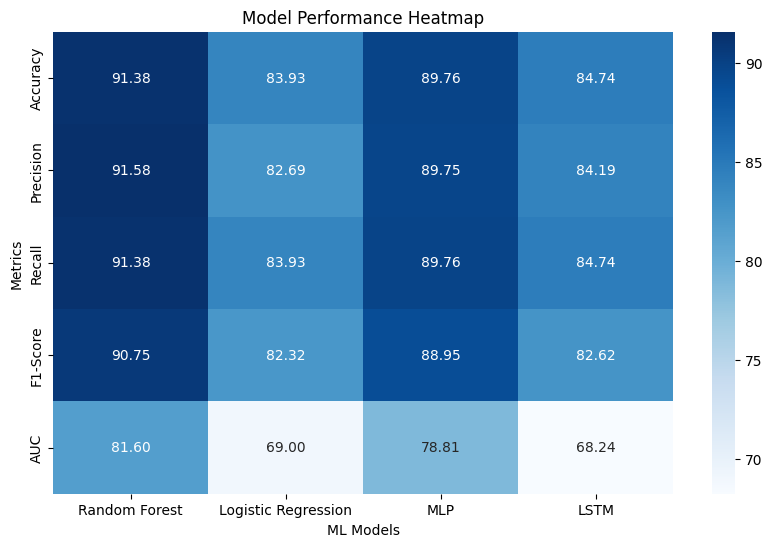

In [115]:
plt.figure(figsize=(10, 6))
sns.heatmap(
    model_data_imb.set_index('Imbalance AI Models').T,
    annot=True, 
    fmt=".2f", 
    cmap="Blues",
    cbar=True
)
plt.title('Model Performance Heatmap')
plt.ylabel('Metrics')
plt.xlabel('ML Models')
plt.show()

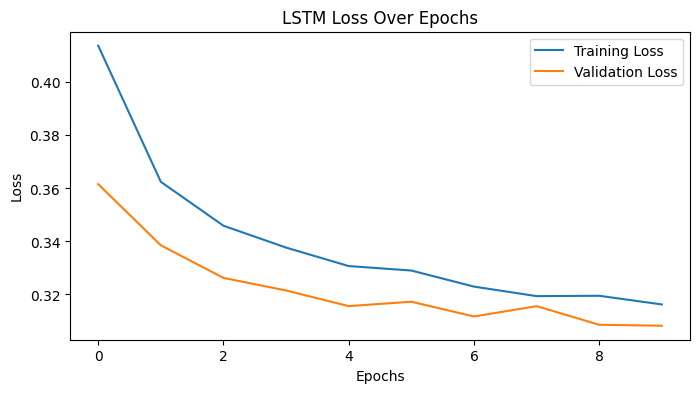

In [116]:
plt.figure(figsize=(8, 4))
plt.plot(lstm_history.history['loss'], label='Training Loss')
plt.plot(lstm_history.history['val_loss'], label='Validation Loss')
plt.title('LSTM Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

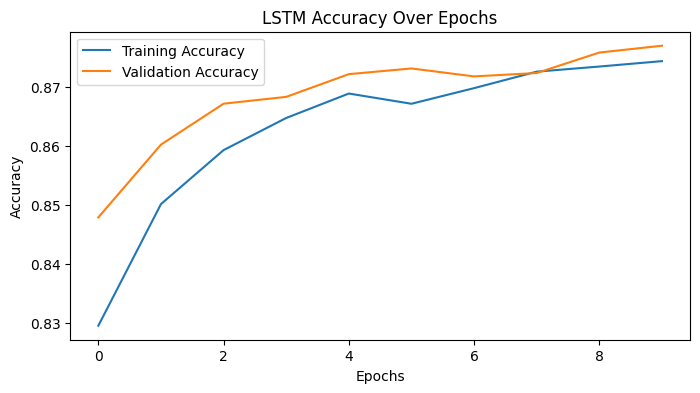

In [117]:
plt.figure(figsize=(8, 4))
plt.plot(lstm_history.history['accuracy'], label='Training Accuracy')
plt.plot(lstm_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('LSTM Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

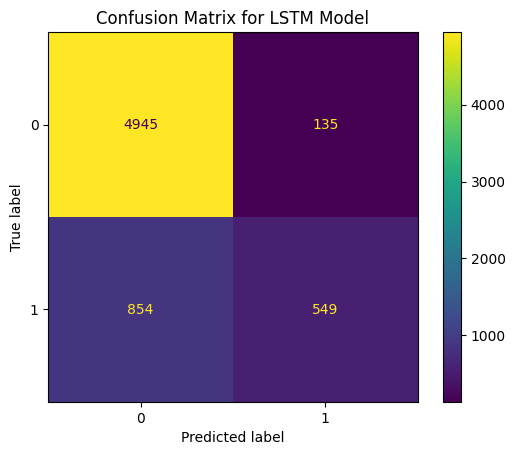

In [120]:
cm_lstm = confusion_matrix(y_test, y_pred_lstm)

# Display the confusion matrix
disp_lstm = ConfusionMatrixDisplay(confusion_matrix=cm_lstm, display_labels=[0, 1])
disp_lstm.plot()
plt.title("Confusion Matrix for LSTM Model")
plt.show()
